In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Read in a CSV file
! wget https://www.statlearning.com/s/Advertising.csv
adv = pd.read_csv('Advertising.csv')

--2024-03-20 00:40:15--  https://www.statlearning.com/s/Advertising.csv
Resolving www.statlearning.com (www.statlearning.com)... 198.185.159.144, 198.49.23.145, 198.185.159.145, ...
Connecting to www.statlearning.com (www.statlearning.com)|198.185.159.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe03b4091076ff5b30c72/1610604603901/Advertising.csv [following]
--2024-03-20 00:40:15--  https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe03b4091076ff5b30c72/1610604603901/Advertising.csv
Resolving static1.squarespace.com (static1.squarespace.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238, ...
Connecting to static1.squarespace.com (static1.squarespace.com)|151.101.0.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4555 (4.4K) [text/csv]
Saving to: ‘Advertising.csv’

Advertising.csv     100%[===================>]   4.45K  --.-KB/s  

In [98]:
# Define the overfitting function
def overfitting(training_size, degree):
    # Get the features and target

    x = adv['TV']
    x = (x - np.mean(x)) / np.sqrt(np.var(x))
    y = adv['sales']

    # The training set
    xTraining = x[:training_size]
    yTraining = y[:training_size]

    # The testing set
    xTesting = x[training_size:]
    yTesting = y[training_size:]

    # This function creates a n-by-2 matrix where every entry is 1.
    X = np.ones((training_size, degree + 1))

    # We make the second column our predictors, so the first column
    # is still filled with 1.
    for i in range(1, degree + 1):
        X[:, i] = np.power(xTraining, i)

    # @ is the matrix multiplication operator in Python
    # np.linalg.inv is the equivalent of solve in R
    B = np.linalg.inv(X.T @ X) @ X.T @ yTraining

    yTrainingHat = B[0]
    yTestingHat = B[0]
    for i in range(1, degree + 1):
        yTrainingHat += B[i] * np.power(xTraining, i)
        yTestingHat += B[i] * np.power(xTesting, i)


    # Get the errors and RSE
    e_train = yTraining - yTrainingHat
    e_test = yTesting - yTestingHat

      # The residual sum of squares for testing and training
    RSSTraining = np.sum(e_train**2)
    RSSTesting = np.sum(e_test**2)

    # I made a mistake here, when I wrote the script... I actually
    # returned RSS instead of RSE.  Why was that a bad thing to do?
    RSETraining = np.sqrt(RSSTraining/(len(e_train)-2))
    RSETesting = np.sqrt(RSSTesting/(len(e_test)-2))

    return([RSETraining,RSETesting])


In [104]:
# Get the training and testing RSE for various sample sizes
rse_train = []
rse_test = []
degree = 13
for training_size in range(degree + 2, 200 - (degree + 2)):
    tmp = overfitting(training_size, degree)
    rse_train.append(tmp[0])
    rse_test.append(tmp[1])

In [100]:
overfitting(training_size, degree)

[3.1611368308935512, 3.505613992118362]

In [101]:
# Print the columns of the DataFrame 'adv'
print(adv.columns)

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


In [102]:
# Plot the results
import matplotlib.pyplot as plt

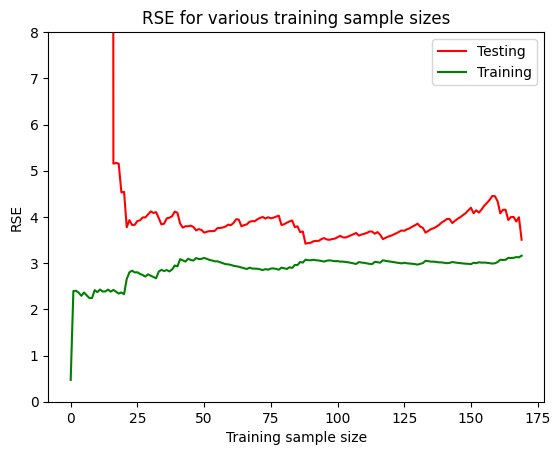

In [106]:
plt.plot(rse_test, color='red', label='Testing')
plt.plot(rse_train, color='green', label='Training')
plt.xlabel('Training sample size')
plt.ylim(0, 8)
plt.ylabel('RSE')
plt.title('RSE for various training sample sizes')
plt.legend()
plt.show()